In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [2]:
# Training
# 1. Get data
from tensorflow.keras.datasets import mnist

In [3]:
# x - input - images 
# y - output - labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(f"Shape of x_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)


In [5]:
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


7


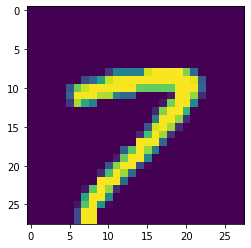

In [6]:
plt.imshow(x_train[123])
print(y_train[123])

In [7]:
# 2. Prepare the data 
# 2.1 Normalize the data - Bring the complete data in a particular range (0-1 or -1 to +1)
# Max Normalization 
# x_train/ max(x_train)

alist = np.array([0,5,10,15,20])
alist/20

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [8]:
x_train = x_train / 255.0

In [9]:
x_train.shape

(60000, 28, 28)

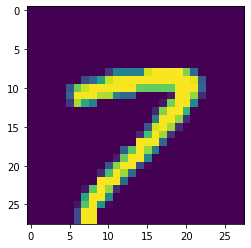

In [10]:
plt.imshow(x_train[123])

In [11]:
# 2.2 Process the outptut 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# Row  | A |  B  | C 
# A    | 1 |  0  | 0 
# B    | 0 |  1  | 0 
# C.   | 0 |  0  | 1
# A.   | 1 |  0  | 0
# B    | 0 |  1  | 0 

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train)

In [18]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
# 3. Make model 
# Using Keras build an NN model

In [ ]:
#affine - w1x1 + w2X2 + b1

In [21]:
# weights - neurons in previous layer * neurons in current layer 
# bias - neurons in curent layer

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [37]:
# Create the model and do a Feed Forward
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=relu))
model.add(Dense(10, activation=softmax))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
(784*512) + 512 # Model capacity

401920

In [39]:
28*28

784

In [40]:
# Select the error mechanism & Back prop opt algo
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss=categorical_crossentropy, 
              metrics=["acc"])

In [41]:
# start training
model_history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=200, validation_split=0.2) # 80% for training

Epoch 1/200
750/750 [==============================] - 2s 3ms/step - loss: 0.9856 - acc: 0.7555 - val_loss: 0.5016 - val_acc: 0.8748
Epoch 2/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4589 - acc: 0.8802 - val_loss: 0.3785 - val_acc: 0.8978
Epoch 3/200
750/750 [==============================] - 2s 2ms/step - loss: 0.3802 - acc: 0.8960 - val_loss: 0.3334 - val_acc: 0.9096
Epoch 4/200
750/750 [==============================] - 2s 2ms/step - loss: 0.3428 - acc: 0.9045 - val_loss: 0.3101 - val_acc: 0.9152
Epoch 5/200
750/750 [==============================] - 2s 2ms/step - loss: 0.3187 - acc: 0.9110 - val_loss: 0.2909 - val_acc: 0.9187
Epoch 6/200
750/750 [==============================] - 2s 2ms/step - loss: 0.3004 - acc: 0.9155 - val_loss: 0.2771 - val_acc: 0.9218
Epoch 7/200
750/750 [==============================] - 2s 2ms/step - loss: 0.2856 - acc: 0.9196 - val_loss: 0.2651 - val_acc: 0.9252
Epoch 8/200
750/750 [==============================] - 2s 2ms/step - 

In [42]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

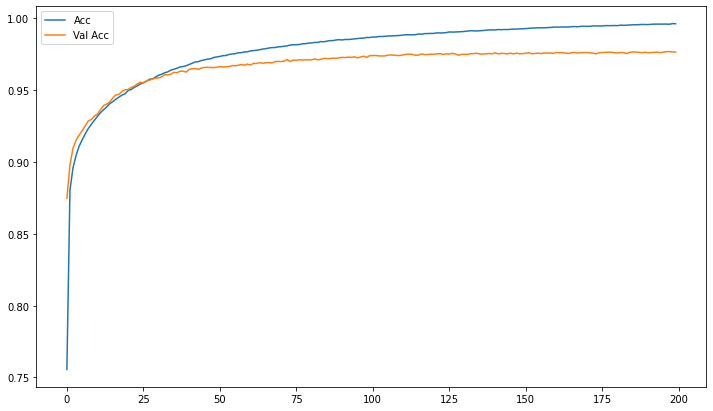

In [46]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history.get("acc"), label="Acc")
plt.plot(model_history.history.get("val_acc"), label="Val Acc")
plt.legend()
plt.show()

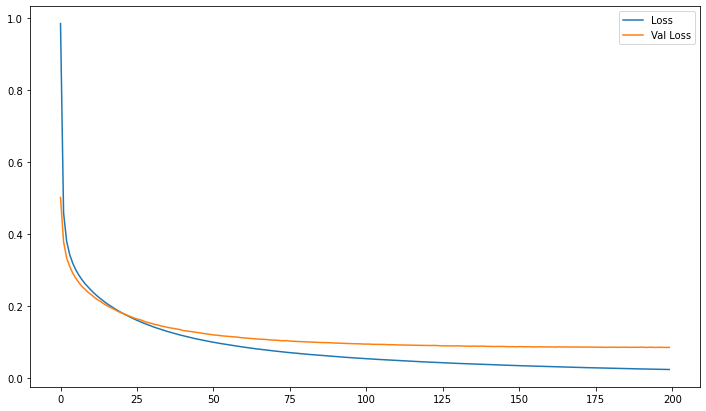

In [47]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history.get("loss"), label="Loss")
plt.plot(model_history.history.get("val_loss"), label="Val Loss")
plt.legend()
plt.show()

In [48]:
# Testing 
x_test = x_test / 255.0 
y_test = to_categorical(y_test)

In [49]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.0727 - acc: 0.9774


[0.07267547398805618, 0.977400004863739]

In [50]:
# 0.07 - test_loss 
# 0.97 - test_acc

In [51]:
# Prediciton

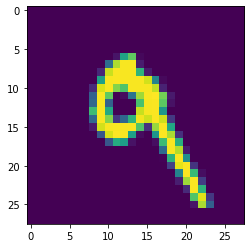

In [52]:
test_image = x_test[7]
plt.imshow(test_image)

In [54]:
#model.predict(test_image) will fail ?? why 

In [55]:
test_image.shape

(28, 28)

In [56]:
model.input_shape

(None, 28, 28)

In [57]:
# if 1 image is used for prediction then technically the shape of image should be (1, 28, 28)
# if 10 image is used for prediction then technically the shape of image should be (10, 28, 28)

In [59]:
test_image2 = np.expand_dims(test_image, axis=0)

In [60]:
test_image2.shape

(1, 28, 28)

In [63]:
result = model.predict(test_image2) # these are 10 probabilities for each digit... 
# we should take the one with highest probability
result

array([[1.22829089e-08, 3.08565677e-06, 4.48554692e-06, 1.22039855e-05,
        2.77259496e-05, 2.76207771e-07, 2.78876700e-10, 4.69966062e-06,
        5.65029211e-07, 9.99946952e-01]], dtype=float32)

In [64]:
np.argmax(result)

9

In [65]:
from tensorflow.keras.datasets import fashion_mnist

In [66]:
y_pred = model.predict(x_test)

In [68]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [70]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [71]:
result = (np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

In [73]:
np.where(result == False)

(array([ 247,  268,  321,  340,  445,  495,  582,  613,  619,  646,  659,
         684,  691,  707,  720,  740,  844,  882,  938,  947,  956,  959,
         965, 1003, 1014, 1039, 1112, 1181, 1182, 1226, 1242, 1247, 1319,
        1378, 1393, 1444, 1500, 1522, 1527, 1530, 1549, 1553, 1609, 1681,
        1709, 1717, 1754, 1790, 1850, 1878, 1901, 1940, 1941, 1984, 1987,
        2016, 2035, 2040, 2043, 2044, 2052, 2053, 2070, 2098, 2109, 2118,
        2130, 2135, 2182, 2224, 2266, 2272, 2293, 2326, 2369, 2387, 2406,
        2422, 2488, 2514, 2597, 2607, 2648, 2654, 2877, 2896, 2939, 2953,
        3060, 3073, 3117, 3251, 3289, 3422, 3474, 3503, 3520, 3533, 3549,
        3558, 3567, 3597, 3618, 3718, 3727, 3749, 3757, 3767, 3780, 3796,
        3811, 3818, 3838, 3853, 3869, 3893, 3906, 3941, 3943, 3995, 4065,
        4075, 4078, 4140, 4163, 4176, 4199, 4201, 4224, 4248, 4289, 4294,
        4350, 4360, 4425, 4437, 4443, 4497, 4500, 4504, 4534, 4536, 4548,
        4601, 4731, 4807, 4814, 4823, 

Label was - 1
Model predicted - 5


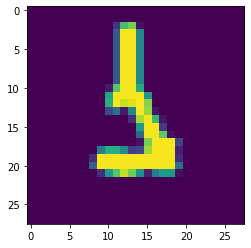

In [93]:
num = 1527
plt.imshow(x_test[num])
print(f"Label was - {np.argmax(y_test[num])}")
print(f"Model predicted - {np.argmax(y_pred[num])}")

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[ 969,    0,    1,    2,    1,    3,    0,    1,    1,    2],
       [   0, 1122,    3,    1,    0,    2,    3,    1,    3,    0],
       [   4,    2, 1009,    2,    1,    0,    2,    5,    7,    0],
       [   0,    0,    5,  992,    0,    4,    0,    1,    5,    3],
       [   1,    0,    4,    1,  958,    0,    1,    2,    2,   13],
       [   4,    0,    0,    9,    1,  865,    7,    0,    3,    3],
       [   5,    3,    1,    1,    4,    4,  938,    1,    1,    0],
       [   0,    4,    8,    1,    1,    0,    0, 1007,    2,    5],
       [   4,    1,    4,    8,    6,    2,    4,    5,  938,    2],
       [   3,    4,    0,    7,    5,    3,    2,    6,    3,  976]])

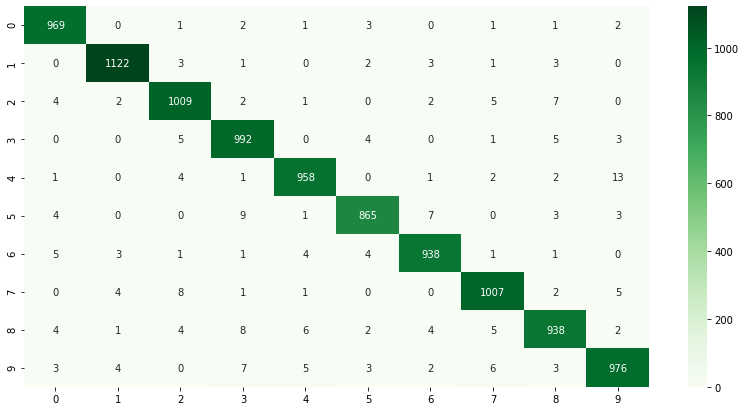

In [92]:
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), annot=True, cmap="Greens", fmt='d')